In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
# Import banking data

# Each record describes characteristics of a client
client = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv('./FP_GroupProject_Group10/data/raw/data_berka/loan.asc', sep=';')

In [3]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [4]:
client.isna().sum() #there are no NAs

client_id       0
birth_number    0
district_id     0
dtype: int64

In [5]:
# Create column year month and day

client['birth_year'] = client['birth_number'].astype(str).str[:2].astype(int) + 1900
client['birth_month'] = client['birth_number'].astype(str).str[2:4].astype(int)
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)

In [6]:
#get gender and fix month

client['gender'] = 'M'
client.loc[client['birth_month'] > 50, 'gender'] = 'F'

client.loc[client['birth_month'] > 50, 'birth_month'] = client.loc[client['birth_month'] > 50, 'birth_month'] - 50
client.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender
0,1,706213,18,1970,12,13,F
1,2,450204,1,1945,2,4,M
2,3,406009,1,1940,10,9,F
3,4,561201,5,1956,12,1,M
4,5,605703,5,1960,7,3,F


9
85


(array([166., 806., 691., 800., 660., 795., 633., 364., 387.,  67.]),
 array([ 9. , 16.6, 24.2, 31.8, 39.4, 47. , 54.6, 62.2, 69.8, 77.4, 85. ]),
 <BarContainer object of 10 artists>)

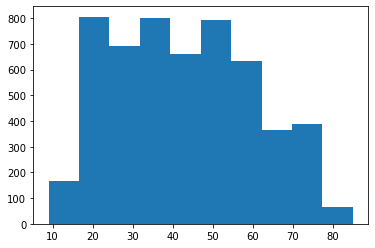

In [7]:
#age of clients

client['age']=1996-client['birth_year']
print(client['age'].min())
print(client['age'].max())
plt.hist(client['age'])

In [8]:
client.groupby('age')['age'].agg('count')

age
9     1
10    1
11    3
12    1
13    3
     ..
81    4
82    4
83    3
84    1
85    2
Name: age, Length: 77, dtype: int64

In [9]:
client.loc[client['age']<=18].groupby('age')['age'].agg('count').sum() #there is 72 clients 18 or younger
72/client.shape[0]

0.013410318495064258

In [10]:
#age group every 15 years 

client['age_group']=client['age'] //15
client.groupby('age_group')['age'].agg([min,max])

,min,max
age_group,,
0,9,14
1,15,29
2,30,44
3,45,59
4,60,74
5,75,85


In [11]:
# Each record describes a credit card issued to an account
card.head()
card.shape

(892, 4)

In [12]:
# Create column year month and day

card['issue_year'] = card['issued'].astype(str).str[:2].astype(int) + 1900
card['issue_month'] = card['issued'].astype(str).str[2:4].astype(int)
card['issue_day'] = card['issued'].astype(str).str[-2:].astype(int)

card.head()

,card_id,disp_id,type,issued,issue_year,issue_month,issue_day
0,1005,9285,classic,931107 00:00:00,1993,11,0
1,104,588,classic,940119 00:00:00,1994,1,0
2,747,4915,classic,940205 00:00:00,1994,2,0
3,70,439,classic,940208 00:00:00,1994,2,0
4,577,3687,classic,940215 00:00:00,1994,2,0


In [13]:
card.isna().sum()

card_id        0
disp_id        0
type           0
issued         0
issue_year     0
issue_month    0
issue_day      0
dtype: int64

In [14]:
card.groupby('type')['type'].agg('count')

type
classic    659
gold        88
junior     145
Name: type, dtype: int64

In [15]:
card.groupby('disp_id')['card_id'].agg('count').sort_values().max()

1

In [16]:
card['lor_card'] = 1996 - card['issue_year']
card.head()

,card_id,disp_id,type,issued,issue_year,issue_month,issue_day,lor_card
0,1005,9285,classic,931107 00:00:00,1993,11,0,3
1,104,588,classic,940119 00:00:00,1994,1,0,2
2,747,4915,classic,940205 00:00:00,1994,2,0,2
3,70,439,classic,940208 00:00:00,1994,2,0,2
4,577,3687,classic,940215 00:00:00,1994,2,0,2


In [17]:
#subset for only 1996 or less

card_96 = card[card['issue_year']<= 1996]
card_96['lor_card'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      3
1      2
2      2
3      2
4      2
      ..
196    0
197    0
198    0
199    0
200    0
Name: lor_card, Length: 201, dtype: int32>

In [18]:
#Dispositon
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [19]:
disp.isna().sum()

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

In [20]:
disp.groupby('type').count()

,disp_id,client_id,account_id
type,,,
DISPONENT,869,869,869
OWNER,4500,4500,4500


In [21]:
#filter only account owners
disp_owners = disp[disp['type']=='OWNER']
disp_no_owners = disp[disp['type']!='OWNER']

In [22]:
owners= pd.merge(client,disp_owners,on='client_id')

not_owners= pd.merge(client,disp_no_owners,on='client_id')

print(owners.shape)
print(not_owners.shape)
owners.head()

(4500, 12)
(869, 12)


,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,type
0,1,706213,18,1970,12,13,F,26,1,1,1,OWNER
1,2,450204,1,1945,2,4,M,51,3,2,2,OWNER
2,4,561201,5,1956,12,1,M,40,2,4,3,OWNER
3,6,190922,12,1919,9,22,M,77,5,6,4,OWNER
4,7,290125,15,1929,1,25,M,67,4,7,5,OWNER


In [23]:
# get number of disponents by owner

ndisp=pd.DataFrame(not_owners.groupby('account_id')['client_id'].agg('count'))
ndisp = ndisp.rename(columns={'client_id':'num_dispo'})

ndisp.head()


,num_dispo
account_id,
2,1
3,1
8,1
12,1
13,1


In [24]:
owners = pd.merge(owners,ndisp,on='account_id',how='left')
owners.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,type,num_dispo
0,1,706213,18,1970,12,13,F,26,1,1,1,OWNER,NaN
1,2,450204,1,1945,2,4,M,51,3,2,2,OWNER,1.0
2,4,561201,5,1956,12,1,M,40,2,4,3,OWNER,1.0
3,6,190922,12,1919,9,22,M,77,5,6,4,OWNER,NaN
4,7,290125,15,1929,1,25,M,67,4,7,5,OWNER,NaN


In [25]:
owners.loc[owners['num_dispo'].isna(),'num_dispo']=0
owners.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,type,num_dispo
0,1,706213,18,1970,12,13,F,26,1,1,1,OWNER,0.0
1,2,450204,1,1945,2,4,M,51,3,2,2,OWNER,1.0
2,4,561201,5,1956,12,1,M,40,2,4,3,OWNER,1.0
3,6,190922,12,1919,9,22,M,77,5,6,4,OWNER,0.0
4,7,290125,15,1929,1,25,M,67,4,7,5,OWNER,0.0


In [26]:
# join cards from 96 and back

owners_cards = pd.merge(owners,card_96, on='disp_id', how = 'left')
owners_cards.head()


,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,type_x,num_dispo,card_id,type_y,issued,issue_year,issue_month,issue_day,lor_card
0,1,706213,18,1970,12,13,F,26,1,1,1,OWNER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,450204,1,1945,2,4,M,51,3,2,2,OWNER,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,561201,5,1956,12,1,M,40,2,4,3,OWNER,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,190922,12,1919,9,22,M,77,5,6,4,OWNER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,290125,15,1929,1,25,M,67,4,7,5,OWNER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#drop variable type_x because all of them are owners

owners_cards = owners_cards.drop('type_x', axis=1)

#rename type_y

owners_cards = owners_cards.rename(columns={'type_y':'card_type'})
owners_cards.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,num_dispo,card_id,card_type,issued,issue_year,issue_month,issue_day,lor_card
0,1,706213,18,1970,12,13,F,26,1,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,450204,1,1945,2,4,M,51,3,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,561201,5,1956,12,1,M,40,2,4,3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,190922,12,1919,9,22,M,77,5,6,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,290125,15,1929,1,25,M,67,4,7,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# create dummy variable if they have card

owners_cards['has_card_96'] = 1
owners_cards.loc[owners_cards['card_id'].isna(),'has_card_96'] = 0


In [29]:
owners_cards.isna().sum()/owners_cards.shape[0] #95% of the clients dont have a credit card

client_id       0.000000
birth_number    0.000000
district_id     0.000000
birth_year      0.000000
birth_month     0.000000
birth_day       0.000000
gender          0.000000
age             0.000000
age_group       0.000000
disp_id         0.000000
account_id      0.000000
num_dispo       0.000000
card_id         0.955333
card_type       0.955333
issued          0.955333
issue_year      0.955333
issue_month     0.955333
issue_day       0.955333
lor_card        0.955333
has_card_96     0.000000
dtype: float64

In [30]:
# use the discrict data 

# rename variables

district = district.rename(columns={'A1':'district_id','A2':'district_name','A3':'region','A4':'inhabitants',
                                   'A5':'nmuni_5','A6':'nmuni_2k','A7':'nmuni_10k','A8':'nmuni_more_10k',
                                   'A9':'ncities','A10':'ratio_urb_inhab','A11':'avg_sal','A12':'unemp_95',
                                   'A13':'unemp_96','A14':'entrep','A15':'crimes_95','A16':'crimes_96'})
district.head()


,district_id,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,crimes_95,crimes_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [31]:
district.isna().sum().sum() #no NAs

0

count    7.700000e+01
mean     1.338849e+05
std      1.369135e+05
min      4.282100e+04
25%      8.585200e+04
50%      1.088710e+05
75%      1.390120e+05
max      1.204953e+06
Name: inhabitants, dtype: float64


(array([62., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  42821. ,  159034.2,  275247.4,  391460.6,  507673.8,  623887. ,
         740100.2,  856313.4,  972526.6, 1088739.8, 1204953. ]),
 <BarContainer object of 10 artists>)

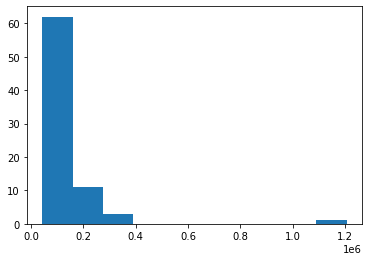

In [32]:
#create variables for inhabitants (large, medium or small)
print(district['inhabitants'].describe())
plt.hist(district['inhabitants'])
#we are going to use lower than 25% as small, up de 75% for medium and more for large

In [33]:
district['district_size'] = 'Small'
district.loc[district['inhabitants']>district['inhabitants'].quantile(0.25),'district_size'] = 'Medium'
district.loc[district['inhabitants']>district['inhabitants'].quantile(0.75),'district_size'] = 'Large'
district.head()


,district_id,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,crimes_95,crimes_96,district_size
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,Large
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,Medium
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,Small
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,Large
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,Medium


In [34]:
district.groupby('district_size')['district_id'].agg('count')

district_size
Large     19
Medium    38
Small     20
Name: district_id, dtype: int64

In [35]:
pd.set_option('display.max_rows', 10) #this is to view the complete data or less

district  #for 1995 in unemployment rate and crimes there is no information and shows a "?" for Jesenik (69)

,district_id,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,crimes_95,crimes_96,district_size
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,Large
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,Medium
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,Small
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,Large
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433,Large
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347,Large
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505,Medium
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807,Medium


In [36]:
#replace the ? with the mean of unemployment in small districts and change it to ratio from 0 to 1
unemp_small = pd.to_numeric(district.loc[(district['unemp_95']!='?') & (district['district_size']=='Small'),'unemp_95']).mean()
unemp_small

district.loc[district['unemp_95']=='?','unemp_95']= unemp_small

district['unemp_95'] = pd.to_numeric(district['unemp_95'])/100

In [37]:
#now change unemp 96 and ratio urb inhab
district['unemp_96'] = pd.to_numeric(district['unemp_96'])/100
district['ratio_urb_inhab'] = district['ratio_urb_inhab']/100

In [38]:
#replace the ? with the mean of crimes only in small districts
crimes_small = pd.to_numeric(district.loc[(district['crimes_95']!='?') & (district['district_size']=='Small'),'crimes_95']).mean()
crimes_small
district.loc[district['crimes_95']=='?','crimes_95'] = crimes_small
district

,district_id,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,crimes_95,crimes_96,district_size
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,1.000,12541,0.0029,0.0043,167,85677,99107,Large
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,0.467,8507,0.0167,0.0185,132,2159,2674,Medium
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,0.417,8980,0.0195,0.0221,111,2824,2813,Small
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,0.674,9753,0.0464,0.0505,109,5244,5892,Large
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,0.514,9307,0.0385,0.0443,118,2616,3040,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,0.564,8746,0.0333,0.0374,90,4355,4433,Large
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,1.000,10673,0.0475,0.0544,100,18782,18347,Large
74,75,Prerov,north Moravia,138032,67,30,4,2,5,0.646,8819,0.0538,0.0566,99,4063,4505,Medium
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,0.512,8369,0.0473,0.0588,107,3736,2807,Medium


In [39]:
#convert crimes to rate: dividing by population times 1000 to get crimes per 1000 persons
district['crime_rate_95'] = (pd.to_numeric(district['crimes_95'])/district['inhabitants'])*1000
district['crime_rate_96'] = (pd.to_numeric(district['crimes_96'])/district['inhabitants'])*1000

district.head()

,district_id,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,crimes_95,crimes_96,district_size,crime_rate_95,crime_rate_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,1.000,12541,0.0029,0.0043,167,85677,99107,Large,71.104018,82.249681
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,0.467,8507,0.0167,0.0185,132,2159,2674,Medium,24.290086,30.084155
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,0.417,8980,0.0195,0.0221,111,2824,2813,Small,37.537218,37.391004
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,0.674,9753,0.0464,0.0505,109,5244,5892,Large,34.984956,39.308040
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,0.514,9307,0.0385,0.0443,118,2616,3040,Medium,27.359438,31.793842


In [40]:
#drop variables crimes 95 and 96

district = district.drop(['crimes_95','crimes_96'],axis=1)


In [41]:
# Merge information with clients owners

In [42]:
owners_dist = pd.merge(owners_cards,district,on='district_id',how='left')
owners_dist.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,...,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,district_size,crime_rate_95,crime_rate_96
0,1,706213,18,1970,12,13,F,26,1,1,...,1,4,0.653,8968,0.0283,0.0335,131,Small,24.611381,27.015941
1,2,450204,1,1945,2,4,M,51,3,2,...,1,1,1.000,12541,0.0029,0.0043,167,Large,71.104018,82.249681
2,4,561201,5,1956,12,1,M,40,2,4,...,1,6,0.514,9307,0.0385,0.0443,118,Medium,27.359438,31.793842
3,6,190922,12,1919,9,22,M,77,5,6,...,1,6,0.580,8754,0.0383,0.0431,137,Medium,35.264670,35.857977
4,7,290125,15,1929,1,25,M,67,4,7,...,1,5,0.519,9045,0.0313,0.0360,124,Small,31.379686,31.957956


In [43]:
pd.set_option('display.max_rows', 10)
owners_dist.isna().sum() #the only variables with NA are the ones for cards

client_id        0
birth_number     0
district_id      0
birth_year       0
birth_month      0
                ..
unemp_96         0
entrep           0
district_size    0
crime_rate_95    0
crime_rate_96    0
Length: 36, dtype: int64

In [44]:
#now order

# Check data size
order.shape

(6471, 6)

In [45]:
#Check for missing values
order.isna().sum()


order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [46]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [47]:
# Calculate the lower and upper boundaries of amount

amount_mean = np.mean(order['amount'])
amount_std = np.std(order['amount'])
amount_lower = amount_mean - 3*amount_std
amount_upper = amount_mean + 3*amount_std


In [48]:
# Check for outliers
order['amount'][(order['amount'] < amount_lower) | (order['amount'] > amount_upper)] 

121     12452.0
292     13841.0
350     14166.0
403     12925.0
419     14367.0
         ...   
6261    12504.0
6311    14801.0
6317    12414.0
6428    11506.0
6446    12154.0
Name: amount, Length: 85, dtype: float64

In [49]:
order.groupby('bank_to')['amount'].agg(['mean', 'max', 'min', 'median', 'count'])

,mean,max,min,median,count
bank_to,,,,,
AB,3289.767823,14707.0,5.0,2637.00,519
CD,3271.199563,13461.0,15.0,2586.00,458
EF,3516.097308,14811.0,3.0,2809.00,483
GH,3292.124846,14336.0,10.0,2509.00,487
IJ,3278.619758,14723.0,2.0,2518.35,496
...,...,...,...,...,...
QR,3254.558004,14520.0,7.0,2564.00,531
ST,3308.537573,14882.0,1.0,2582.00,511
UV,3358.124649,13628.0,1.0,2687.00,499


In [50]:
order.groupby('k_symbol')['order_id'].agg('count') #there are several empty

k_symbol
            1379
LEASING      341
POJISTNE     532
SIPO        3502
UVER         717
Name: order_id, dtype: int64

In [51]:
#translate ksymbol to english and fill blanks

order.loc[order['k_symbol'] == ' ','k_symbol'] = 'other_payments'
order.loc[order['k_symbol'] == "POJISTNE", 'k_symbol'] = 'insurance_payment'
order.loc[order['k_symbol'] == "SIPO", 'k_symbol'] = 'household_payment'
order.loc[order['k_symbol'] == "LEASING", 'k_symbol'] = 'leasing_payment'
order.loc[order['k_symbol'] == "UVER", 'k_symbol'] = 'loan_payment'
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,household_payment
1,29402,2,ST,89597016,3372.7,loan_payment
2,29403,2,QR,13943797,7266.0,household_payment
3,29404,3,WX,83084338,1135.0,household_payment
4,29405,3,CD,24485939,327.0,other_payments


In [52]:
# Pivot table by ksymbol
ksymbol_pv = order.pivot_table(index='account_id',  
                               columns='k_symbol',    
                               values='amount',  
                               aggfunc='sum',fill_value=0) #merge with account

In [53]:
ksymbol_pv.head() #fill the NaNs with zeros


k_symbol,household_payment,insurance_payment,leasing_payment,loan_payment,other_payments
account_id,,,,,
1,2452,0,0.0,0.0,0
2,7266,0,0.0,3372.7,0
3,1135,3539,0.0,0.0,327
4,3363,0,0.0,0.0,0
5,2668,0,0.0,0.0,0


In [54]:
#number of payments for banks by account
uni_banks = pd.DataFrame(order.groupby('account_id')['bank_to'].agg('nunique'))
uni_banks = uni_banks.rename(columns={'bank_to':'n_of_banks'})

In [55]:
#number of orders by account
n_orders = pd.DataFrame(order.groupby('account_id')['order_id'].agg('count'))
n_orders = n_orders.rename(columns={'order_id':'n_orders'})

In [56]:
#total payments by account
total_payments = pd.DataFrame(order.groupby('account_id')['amount'].agg('sum'))
total_payments = total_payments.rename(columns={'amount':'total_payments'})

In [57]:
#merge by account before merging to clients

new_orders= pd.merge(ksymbol_pv,uni_banks,on='account_id',how='left')
new_orders= pd.merge(new_orders,n_orders,on='account_id',how='left')
new_orders= pd.merge(new_orders,total_payments,on='account_id',how='left')

new_orders.head()

,household_payment,insurance_payment,leasing_payment,loan_payment,other_payments,n_of_banks,n_orders,total_payments
account_id,,,,,,,,
1,2452,0,0.0,0.0,0,1,1,2452.0
2,7266,0,0.0,3372.7,0,2,2,10638.7
3,1135,3539,0.0,0.0,327,3,3,5001.0
4,3363,0,0.0,0.0,0,1,2,3363.0
5,2668,0,0.0,0.0,0,1,1,2668.0


In [58]:
#here we should merge orders and clients

#owners_dist = pd.merge(owners_dist, new_orders, on ='account_id', how='left')

In [59]:
# now we are going to work with transactions
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [60]:
# Create year column
trans['t_year'] = trans['date'].astype(str).str[:2].astype(int) + 1900

#Create month column
trans['t_month'] = trans['date'].astype(str).str[2:4].astype(int)

#Create day column
trans['t_day'] = trans['date'].astype(str).str[-2:].astype(int)

trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,t_year,t_month,t_day
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993,1,1
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,1993,1,1
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,1993,1,2


In [61]:
#Check for missing values
trans.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
               ...  
bank          782812
account       760931
t_year             0
t_month            0
t_day              0
Length: 13, dtype: int64

In [62]:
#translate type to english and fill blanks

trans.loc[trans['type'] == 'VYDAJ','type'] = 'debit'
trans.loc[trans['type'] == "PRIJEM", 'type'] = 'credit'
trans.loc[trans['type'] == "VYBER", 'type'] = 'debit_cash'

trans.groupby('type')['amount'].agg('count')

type
credit        405083
debit         634571
debit_cash     16666
Name: amount, dtype: int64

In [63]:
trans.groupby('operation')['amount'].agg('count')

operation
PREVOD NA UCET    208283
PREVOD Z UCTU      65226
VKLAD             156743
VYBER             434918
VYBER KARTOU        8036
Name: amount, dtype: int64

In [64]:
#translate operation to english and fill blanks

trans.loc[trans['operation'] == 'PREVOD NA UCET','operation'] = 'remit_other_bank'
trans.loc[trans['operation'] == "PREVOD Z UCTU", 'operation'] = 'collect_other_bank'
trans.loc[trans['operation'] == "VKLAD", 'operation'] = 'credit_cash'
trans.loc[trans['operation'] == "VYBER", 'operation'] = 'debit_cash'
trans.loc[trans['operation'] == "VYBER KARTOU", 'operation'] = 'debit_card'

trans.groupby('operation')['amount'].agg('count')

operation
collect_other_bank     65226
credit_cash           156743
debit_card              8036
debit_cash            434918
remit_other_bank      208283
Name: amount, dtype: int64

In [65]:
trans[trans['type']=='debit'].head(15)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,t_year,t_month,t_day
136,695560,2378,930131,debit,debit_cash,34700.0,59453.7,NaN,NaN,NaN,1993,1,31
189,145127,485,930203,debit,debit_cash,25300.0,46177.9,NaN,NaN,NaN,1993,2,3
222,1028004,3510,930206,debit,debit_cash,1600.0,22271.0,NaN,NaN,NaN,1993,2,6
233,695340,2378,930207,debit,remit_other_bank,9612.0,80033.7,SIPO,EF,1222903.0,1993,2,7
249,622121,2122,930207,debit,debit_cash,14100.0,32859.1,NaN,NaN,NaN,1993,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1549098,5270,930212,debit,debit_cash,9600.0,36059.2,NaN,NaN,NaN,1993,2,12
348,1143204,3909,930213,debit,debit_cash,500.0,24600.0,NaN,NaN,NaN,1993,2,13
393,64021,212,930219,debit,debit_cash,14800.0,34990.0,NaN,NaN,NaN,1993,2,19
398,695562,2378,930220,debit,debit_cash,33900.0,71107.7,NaN,NaN,NaN,1993,2,20


In [66]:
trans.groupby('k_symbol')['trans_id'].agg('count')

k_symbol
                53433
DUCHOD          30338
POJISTNE        18500
SANKC. UROK      1577
SIPO           118065
SLUZBY         155832
UROK           183114
UVER            13580
Name: trans_id, dtype: int64

In [67]:
#change to english k_symbol

trans.loc[trans['k_symbol'] == ' ','k_symbol'] = 'trans_others'
trans.loc[trans['k_symbol'] == 'POJISTNE','k_symbol'] = 'trans_insurance'
trans.loc[trans['k_symbol'] == "DUCHOD", 'k_symbol'] = 'trans_pension'
trans.loc[trans['k_symbol'] == "SANKC. UROK", 'k_symbol'] = 'trans_interest'
trans.loc[trans['k_symbol'] == "SIPO", 'k_symbol'] = 'trans_household'
trans.loc[trans['k_symbol'] == "SLUZBY", 'k_symbol'] = 'trans_statement'
trans.loc[trans['k_symbol'] == "UROK", 'k_symbol'] = 'trans_interest_cred'
trans.loc[trans['k_symbol'] == "UVER", 'k_symbol'] = 'trans_loan'

trans.groupby('k_symbol')['trans_id'].agg('count')

k_symbol
trans_household        118065
trans_insurance         18500
trans_interest           1577
trans_interest_cred    183114
trans_loan              13580
trans_others            53433
trans_pension           30338
trans_statement        155832
Name: trans_id, dtype: int64

In [68]:
#fill NAs also
trans.k_symbol = trans.k_symbol.fillna('others')

In [69]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,t_year,t_month,t_day
0,695247,2378,930101,credit,credit_cash,700.0,700.0,others,NaN,NaN,1993,1,1
1,171812,576,930101,credit,credit_cash,900.0,900.0,others,NaN,NaN,1993,1,1
2,207264,704,930101,credit,credit_cash,1000.0,1000.0,others,NaN,NaN,1993,1,1
3,1117247,3818,930101,credit,credit_cash,600.0,600.0,others,NaN,NaN,1993,1,1
4,579373,1972,930102,credit,credit_cash,400.0,400.0,others,NaN,NaN,1993,1,2


In [70]:
# subset for only transactions in 1996

trans_96 = trans[trans['t_year']==1996]
trans_96['t_year'].max()

1996

In [71]:
# Mean, min max and sum of transactions
trans_sm = pd.DataFrame(trans_96.groupby('account_id')['amount'].agg(['mean','sum','min','max','count']))

trans_sm = trans_sm.rename(columns={'mean':'mean_amount',
                                   'sum':'sum_amount',
                                   'min':'min_amount',
                                   'max':'max_amount',
                                   'count':'n_trans',})
trans_sm.head()

,mean_amount,sum_amount,min_amount,max_amount,n_trans
account_id,,,,,
1,1427.637838,105645.2,14.6,3700.0,74
2,6624.907059,563117.1,14.6,30354.0,85
4,2279.438462,88898.1,14.6,5553.0,39
6,2592.236508,163310.9,14.6,11600.0,63
7,10376.350000,41505.4,30.4,33975.0,4


In [72]:
# Pivot table
trans_type_mean = trans_96.pivot_table(index='account_id',   # Group by
                               columns='type',    # Group by
                               values='amount',  # Column to aggregate
                               aggfunc='mean',fill_value=0)   # Agg function Mean


In [73]:
trans_type_mean = trans_type_mean.rename(columns={'credit':'credit_mean',
                                   'debit':'debit_mean',
                                   'debit_cash':'debit_cash_mean'})

trans_type_mean.head()

type,credit_mean,debit_mean,debit_cash_mean
account_id,,,
1,1726.413793,1235.093333,0.0
2,9949.755172,3962.101961,14501.4
4,3348.264706,1453.527273,0.0
6,3396.154167,2097.517949,0.0
7,11635.133333,6600.000000,0.0


In [74]:
# Pivot table
trans_type_sum = trans_96.pivot_table(index='account_id',   # Group by
                               columns='type',    # Group by
                               values='amount',  # Column to aggregate
                               aggfunc='sum',fill_value=0)   # Agg function Mean



In [75]:
trans_type_sum = trans_type_sum.rename(columns={'credit':'credit_sum',
                                   'debit':'debit_sum',
                                   'debit_cash':'debit_cash_sum'})
trans_type_sum.head()

type,credit_sum,debit_sum,debit_cash_sum
account_id,,,
1,50066.0,55579.2,0
2,288542.9,202067.2,72507
4,56920.5,31977.6,0
6,81507.7,81803.2,0
7,34905.4,6600.0,0


In [76]:
# Pivot table
trans_ksymbol_sum = trans_96.pivot_table(index='account_id',   # Group by
                               columns='k_symbol',    # Group by
                               values='amount',  # Column to aggregate
                               aggfunc='sum',fill_value=0)   # Agg function Mean

trans_ksymbol_sum.columns = trans_ksymbol_sum.columns + '_sum'
trans_ksymbol_sum.head()

k_symbol,others_sum,trans_household_sum,trans_insurance_sum,trans_interest_sum,trans_interest_cred_sum,trans_loan_sum,trans_others_sum,trans_pension_sum,trans_statement_sum
account_id,,,,,,,,,
1,75228.0,29424,0,0.0,818.0,0.0,0,0,175.2
2,473775.0,87192,0,0.0,1974.9,0.0,0,0,175.2
4,14590.0,10390,0,0.0,590.5,0.0,7710,55530,87.6
6,34180.0,47448,0,0.0,1479.7,0.0,0,80028,175.2
7,41475.0,0,0,0.0,30.4,0.0,0,0,0.0


In [77]:
# Pivot table
trans_ksymbol_mean = trans_96.pivot_table(index='account_id',   # Group by
                               columns='k_symbol',    # Group by
                               values='amount',  # Column to aggregate
                               aggfunc='mean',fill_value=0)   # Agg function Mean

trans_ksymbol_mean.columns = trans_ksymbol_mean.columns + '_mean'

trans_ksymbol_mean.head()

k_symbol,others_mean,trans_household_mean,trans_insurance_mean,trans_interest_mean,trans_interest_cred_mean,trans_loan_mean,trans_others_mean,trans_pension_mean,trans_statement_mean
account_id,,,,,,,,,
1,1979.684211,2452.0,0,0.0,68.166667,0.0,0.0,0,14.6
2,9668.877551,7266.0,0,0.0,164.575000,0.0,0.0,0,14.6
4,2431.666667,2078.0,0,0.0,98.416667,0.0,1285.0,5553,14.6
6,2278.666667,3954.0,0,0.0,123.308333,0.0,0.0,6669,14.6
7,13825.000000,0.0,0,0.0,30.400000,0.0,0.0,0,0.0


In [78]:
# mean balance by account and year

balance_year =  trans_96.groupby('account_id')['balance'].agg('mean')
balance_year.head()

account_id
1    15980.927027
2    36604.402353
4    23648.623077
6    30651.373016
7    23088.850000
Name: balance, dtype: float64

In [79]:
# Pivot table
trans_operation_mean = trans_96.pivot_table(index='account_id',   # Group by
                               columns='operation',    # Group by
                               values='amount',  # Column to aggregate
                               aggfunc='mean',fill_value=0)   # Agg function Mean

trans_operation_mean.columns = 'op_' + trans_operation_mean.columns + '_mean'

trans_operation_mean.head()

operation,op_collect_other_bank_mean,op_credit_cash_mean,op_debit_card_mean,op_debit_cash_mean,op_remit_other_bank_mean
account_id,,,,,
1,3679.000000,1020.0,0.0,792.581818,2452.000000
2,21922.333333,4700.0,0.0,4258.686364,7266.000000
4,5553.000000,800.0,0.0,1261.600000,1645.454545
6,6669.000000,0.0,0.0,1272.414815,3954.000000
7,0.000000,17437.5,0.0,6600.000000,0.000000


In [80]:
# Pivot table = number of transactions to other banks 
trans_bank = trans_96.pivot_table(index='account_id',   # Group by
                               values='bank',  # Column to aggregate
                               aggfunc='count',fill_value=0)   # Agg function Mean

trans_bank = trans_bank.rename(columns={'bank':'ntrans_banks'})
trans_bank

,ntrans_banks
account_id,
1,24
2,24
4,21
6,24
7,0
...,...
11333,0
11349,36
11359,41


In [81]:
#transactions per month mean and total
trans_month = trans_96.pivot_table(index='account_id',  
                               columns='t_month',   
                               values='amount',  
                               aggfunc='mean',fill_value=0)  

trans_month.columns =  'mean_amount_' +trans_month.columns.astype(str) 

trans_month.head()

t_month,mean_amount_1,mean_amount_2,mean_amount_3,mean_amount_4,mean_amount_5,mean_amount_6,mean_amount_7,mean_amount_8,mean_amount_9,mean_amount_10,mean_amount_11,mean_amount_12
account_id,,,,,,,,,,,,
1,1006.641667,1261.060000,1282.26,1642.640000,1461.483333,1328.516667,1368.066667,1595.900000,1584.880000,1581.466667,1803.600000,1680.800000
2,5771.670000,6158.666667,6717.15,8089.814286,6602.425000,8033.250000,7220.087500,5197.433333,7559.714286,5748.000000,5272.642857,7154.762500
4,0.000000,800.000000,5553.00,5553.000000,5553.000000,5553.000000,1763.840000,2189.316667,2054.916667,1806.240000,1808.120000,1932.814286
6,1778.083333,2805.480000,2262.14,2455.460000,2691.525000,4469.300000,2685.300000,2688.225000,2691.125000,2490.960000,2695.250000,2625.250000
7,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.000000,13535.133333


In [82]:
trans_96.head(1)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,t_year,t_month,t_day
252855,732811,2504,960101,debit,debit_card,900.0,38124.4,others,NaN,0.0,1996,1,1


In [83]:
#recency variable, time since last transaction 

#recency debit in months
rec_debit_m = pd.DataFrame(trans_96[trans_96['type']=='debit'].groupby('account_id')['t_month'].agg('max'))
rec_debit_m['rec_debit_m'] = 12 - rec_debit_m['t_month'] 
rec_debit_m = rec_debit_m.drop('t_month',axis=1)

#recency credit in months
rec_credit_m = pd.DataFrame(trans_96[trans_96['type']=='credit'].groupby('account_id')['t_month'].agg('max'))
rec_credit_m['rec_credit_m'] = 12 - rec_credit_m['t_month'] 
rec_credit_m = rec_credit_m.drop('t_month',axis=1)

rec_m = pd.merge(rec_debit_m,rec_credit_m,on='account_id')
rec_m.head()

,rec_debit_m,rec_credit_m
account_id,,
1,0,0
2,0,0
4,0,0
6,0,0
7,0,0


In [84]:
trans_96['date_f'] = pd.to_datetime(dict(year=trans_96.t_year, month=trans_96.t_month, day=trans_96.t_day))

<ipython-input-84-74152dcf11f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_96['date_f'] = pd.to_datetime(dict(year=trans_96.t_year, month=trans_96.t_month, day=trans_96.t_day))


In [85]:
# https://www.codegrepper.com/code-examples/python/pandas+timedelta64+ns+to+float 

#recency debit in days

rec_debit_d = pd.DataFrame(trans_96[trans_96['type']=='debit'].groupby('account_id')['date_f'].agg('max'))
rec_debit_d['rec_debit_d'] = ((pd.to_datetime('1996-12-31') - rec_debit_d['date_f'])/np.timedelta64(1,'D')).astype(int) 
rec_debit_d = rec_debit_d.drop('date_f',axis=1)

#recency credit in days
rec_credit_d = pd.DataFrame(trans_96[trans_96['type']=='credit'].groupby('account_id')['date_f'].agg('max'))
rec_credit_d['rec_credit_d'] = ((pd.to_datetime('1996-12-31') - rec_credit_d['date_f'])/np.timedelta64(1,'D')).astype(int)
rec_credit_d = rec_credit_d.drop('date_f',axis=1)

rec_d = pd.merge(rec_debit_d,rec_credit_d,on='account_id')
rec_d.head()

,rec_debit_d,rec_credit_d
account_id,,
1,0,0
2,0,0
4,0,0
6,0,0
7,7,0


In [86]:
#merge recency 

rec = pd.merge(rec_m, rec_d, on = 'account_id')
rec.head()

,rec_debit_m,rec_credit_m,rec_debit_d,rec_credit_d
account_id,,,,
1,0,0,0,0
2,0,0,0,0
4,0,0,0,0
6,0,0,0,0
7,0,0,7,0


In [87]:
#start merging by account 
transC = pd.merge(trans_sm,rec,on='account_id')
transC = pd.merge(transC, trans_type_mean, on='account_id')
transC = pd.merge(transC,trans_type_sum,on='account_id')
transC = pd.merge(transC,trans_ksymbol_sum,on='account_id')
transC = pd.merge(transC,trans_ksymbol_mean,on='account_id')
transC = pd.merge(transC,balance_year,on='account_id')
transC = pd.merge(transC,trans_operation_mean,on='account_id')
transC = pd.merge(transC,trans_bank,on='account_id')
transC = pd.merge(transC,trans_month,on='account_id')

transC.head()



,mean_amount,sum_amount,min_amount,max_amount,n_trans,rec_debit_m,rec_credit_m,rec_debit_d,rec_credit_d,credit_mean,...,mean_amount_3,mean_amount_4,mean_amount_5,mean_amount_6,mean_amount_7,mean_amount_8,mean_amount_9,mean_amount_10,mean_amount_11,mean_amount_12
account_id,,,,,,,,,,,,,,,,,,,,,
1,1427.637838,105645.2,14.6,3700.0,74,0,0,0,0,1726.413793,...,1282.26,1642.640000,1461.483333,1328.516667,1368.066667,1595.900000,1584.880000,1581.466667,1803.600000,1680.800000
2,6624.907059,563117.1,14.6,30354.0,85,0,0,0,0,9949.755172,...,6717.15,8089.814286,6602.425000,8033.250000,7220.087500,5197.433333,7559.714286,5748.000000,5272.642857,7154.762500
4,2279.438462,88898.1,14.6,5553.0,39,0,0,0,0,3348.264706,...,5553.00,5553.000000,5553.000000,5553.000000,1763.840000,2189.316667,2054.916667,1806.240000,1808.120000,1932.814286
6,2592.236508,163310.9,14.6,11600.0,63,0,0,0,0,3396.154167,...,2262.14,2455.460000,2691.525000,4469.300000,2685.300000,2688.225000,2691.125000,2490.960000,2695.250000,2625.250000
7,10376.350000,41505.4,30.4,33975.0,4,0,0,7,0,11635.133333,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.000000,13535.133333


In [88]:
#has made a transaction to an external bank 

transC['to_bank'] = 1
transC.loc[transC['ntrans_banks']==0,'to_bank'] = 0
transC.shape

(3298, 53)

In [89]:
# merge all the transactions to the clients

owners_complete = pd.merge(owners_dist,transC,on='account_id',how='left')
owners_complete.shape

(4500, 89)

In [90]:
#check NAs
owners_complete.isna().sum() #we dont treat them yet

client_id            0
birth_number         0
district_id          0
birth_year           0
birth_month          0
                  ... 
mean_amount_9     1202
mean_amount_10    1202
mean_amount_11    1202
mean_amount_12    1202
to_bank           1202
Length: 89, dtype: int64

In [91]:
### account

account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [92]:
# Check shape and missing values
print(account.shape)
print(account.isna().sum().sum())

(4500, 4)
0


In [93]:
#Translate frequency to english
account.loc[account['frequency'] == "POPLATEK MESICNE", 'frequency'] = 'monthly'
account.loc[account['frequency'] == "POPLATEK TYDNE", 'frequency'] = 'weekly'
account.loc[account['frequency'] == "POPLATEK PO OBRATU", 'frequency'] = 'transaction'
account['frequency'].value_counts()

monthly        4167
weekly          240
transaction      93
Name: frequency, dtype: int64

In [94]:
# Create column year for account table
account['open_year'] = account['date'].astype(str).str[:2].astype(int) + 1900
# Add column month
account['open_month'] = account['date'].astype(str).str[2:4].astype(int)
# Add column day
account['open_day'] = account['date'].astype(str).str[-2:].astype(int)

In [95]:
# Add length of relationship in year
account['lor'] = 1996 - account['open_year']

#those with zero we eliminate 
account['lor'].value_counts()

 0    1363
 3    1139
-1     898
 1     661
 2     439
Name: lor, dtype: int64

In [96]:
account2 = account[account['lor']>0].drop(['district_id','date'],axis=1)
account2.head()

,account_id,frequency,open_year,open_month,open_day,lor
0,576,monthly,1993,1,1,3
1,3818,monthly,1993,1,1,3
2,704,monthly,1993,1,1,3
3,2378,monthly,1993,1,1,3
4,2632,monthly,1993,1,2,3


In [97]:
#merge with owners only accounts with complete information

owners_complete = pd.merge(owners_complete,account2, on ='account_id')
owners_complete.shape

(2239, 94)

In [98]:
owners_complete.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,...,mean_amount_9,mean_amount_10,mean_amount_11,mean_amount_12,to_bank,frequency,open_year,open_month,open_day,lor
0,1,706213,18,1970,12,13,F,26,1,1,...,1584.880000,1581.466667,1803.600000,1680.800000,1.0,monthly,1995,3,24,1
1,2,450204,1,1945,2,4,M,51,3,2,...,7559.714286,5748.000000,5272.642857,7154.762500,1.0,monthly,1993,2,26,3
2,8,385221,51,1938,2,21,F,58,3,8,...,2691.125000,2490.960000,2695.250000,2625.250000,1.0,monthly,1994,9,27,2
3,10,430501,57,1943,5,1,M,53,3,10,...,6487.883333,7028.714286,6156.657143,7473.000000,1.0,monthly,1995,9,21,1
4,12,810220,40,1981,2,20,M,15,1,12,...,427.475000,572.620000,3455.850000,2008.516667,0.0,monthly,1993,1,27,3


In [99]:
owners_complete.isna().sum()[owners_complete.isna().sum()>0] #its ok to have those NAs

card_id           2048
card_type         2048
issued            2048
issue_year        2048
issue_month       2048
                  ... 
mean_amount_9        1
mean_amount_10       1
mean_amount_11       1
mean_amount_12       1
to_bank              1
Length: 60, dtype: int64

In [100]:
## loan 
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [101]:
# Check shape and missing values
print(loan.shape)
print(loan.isna().sum().sum())

(682, 7)
0


In [102]:
loan['loan_year'] = loan['date'].astype(str).str[:2].astype(int) + 1900
loan['loan_month'] = loan['date'].astype(str).str[2:4].astype(int)
loan['loan_day'] = loan['date'].astype(str).str[-2:].astype(int) 

In [103]:
# Translate status
loan.loc[loan['status'] == "A",'status'] = 'no_problem'
loan.loc[loan['status'] == "B", 'status'] = 'loan_not_paid'
loan.loc[loan['status'] == "C", 'status'] = 'ok'
loan.loc[loan['status'] == "D", 'status'] = 'client_in_debt'
loan['status'].value_counts()

ok                403
no_problem        203
client_in_debt     45
loan_not_paid      31
Name: status, dtype: int64

In [104]:
loan = loan.rename(columns={'amount':'loan_amount'})

In [105]:
loan

,loan_id,account_id,date,loan_amount,duration,payments,status,loan_year,loan_month,loan_day
0,5314,1787,930705,96396,12,8033.0,loan_not_paid,1993,7,5
1,5316,1801,930711,165960,36,4610.0,no_problem,1993,7,11
2,6863,9188,930728,127080,60,2118.0,no_problem,1993,7,28
3,5325,1843,930803,105804,36,2939.0,no_problem,1993,8,3
4,7240,11013,930906,274740,60,4579.0,no_problem,1993,9,6
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,ok,1998,12,5
678,5221,1284,981205,52512,12,4376.0,ok,1998,12,5
679,6402,6922,981206,139488,24,5812.0,ok,1998,12,6
680,5346,1928,981206,55632,24,2318.0,ok,1998,12,6


In [106]:
loan['loan_date'] = loan[loan.columns[7:10]].apply(lambda x: '-'.join(x.astype(str)), axis = 1)

In [107]:
loan['time_since_loan'] = pd.to_datetime("1996-12-31") - pd.to_datetime(loan['loan_date'])
loan['time_since_loan'] = loan['time_since_loan'].dt.days

In [108]:
loan2 = loan.loc[loan['loan_year'] < 1997,('account_id','time_since_loan')]
loan2.head()

,account_id,time_since_loan
0,1787,1275
1,1801,1269
2,9188,1252
3,1843,1246
4,11013,1212


In [109]:
owners_complete = pd.merge(owners_complete,loan2,on='account_id',how='left')
owners_complete.shape

(2239, 95)

In [110]:
owners_complete.isna().sum()

client_id             0
birth_number          0
district_id           0
birth_year            0
birth_month           0
                   ... 
open_year             0
open_month            0
open_day              0
lor                   0
time_since_loan    1944
Length: 95, dtype: int64

### Create dependent variable (or target variable).

In [111]:
# Select on loan in 1997
loan97 = loan.loc[loan['loan_year'] == 1997,('loan_id','account_id')]
loan97.tail()

,loan_id,account_id
519,6059,5196
520,5799,4052
521,6147,5602
522,6254,6157
523,7100,10280


In [112]:
owners_complete2 = pd.merge(owners_complete,loan97,on='account_id',how='left')
owners_complete2.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,...,mean_amount_11,mean_amount_12,to_bank,frequency,open_year,open_month,open_day,lor,time_since_loan,loan_id
0,1,706213,18,1970,12,13,F,26,1,1,...,1803.600000,1680.800000,1.0,monthly,1995,3,24,1,NaN,NaN
1,2,450204,1,1945,2,4,M,51,3,2,...,5272.642857,7154.762500,1.0,monthly,1993,2,26,3,1091.0,NaN
2,8,385221,51,1938,2,21,F,58,3,8,...,2695.250000,2625.250000,1.0,monthly,1994,9,27,2,NaN,NaN
3,10,430501,57,1943,5,1,M,53,3,10,...,6156.657143,7473.000000,1.0,monthly,1995,9,21,1,NaN,NaN
4,12,810220,40,1981,2,20,M,15,1,12,...,3455.850000,2008.516667,0.0,monthly,1993,1,27,3,NaN,NaN


In [113]:
owners_complete2.loc[owners_complete2['loan_id'].isnull() == True, 'has_loan_97'] = 0
owners_complete2.loc[owners_complete2['loan_id'].isnull() == False, 'has_loan_97'] = 1
owners_complete2['has_loan_97'] = owners_complete2['has_loan_97'].astype(int)

In [114]:
pd.DataFrame(owners_complete2.groupby('has_loan_97')['has_loan_97'].agg('count'))

,has_loan_97
has_loan_97,
0,2208
1,31


In [115]:
card.head()

,card_id,disp_id,type,issued,issue_year,issue_month,issue_day,lor_card
0,1005,9285,classic,931107 00:00:00,1993,11,0,3
1,104,588,classic,940119 00:00:00,1994,1,0,2
2,747,4915,classic,940205 00:00:00,1994,2,0,2
3,70,439,classic,940208 00:00:00,1994,2,0,2
4,577,3687,classic,940215 00:00:00,1994,2,0,2


In [116]:
# Select card issue in 1997
card97 = card.loc[card['issue_year'] == 1997,('card_id','disp_id')]
card97.head()

,card_id,disp_id
201,1118,11393
202,175,1040
203,565,3601
204,714,4638
205,137,786


In [117]:
owners_complete2 = pd.merge(owners_complete2,card97,on='disp_id',how='left')
owners_complete2.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,...,to_bank,frequency,open_year,open_month,open_day,lor,time_since_loan,loan_id,has_loan_97,card_id_y
0,1,706213,18,1970,12,13,F,26,1,1,...,1.0,monthly,1995,3,24,1,NaN,NaN,0,NaN
1,2,450204,1,1945,2,4,M,51,3,2,...,1.0,monthly,1993,2,26,3,1091.0,NaN,0,NaN
2,8,385221,51,1938,2,21,F,58,3,8,...,1.0,monthly,1994,9,27,2,NaN,NaN,0,NaN
3,10,430501,57,1943,5,1,M,53,3,10,...,1.0,monthly,1995,9,21,1,NaN,NaN,0,NaN
4,12,810220,40,1981,2,20,M,15,1,12,...,0.0,monthly,1993,1,27,3,NaN,NaN,0,NaN


In [118]:
owners_complete2.loc[owners_complete2['card_id_y'].isnull() == True, 'card_issued_97'] = 0
owners_complete2.loc[owners_complete2['card_id_y'].isnull() == False, 'card_issued_97'] = 1
owners_complete2['card_issued_97'] = owners_complete2['card_issued_97'].astype(int)
owners_complete2.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,...,frequency,open_year,open_month,open_day,lor,time_since_loan,loan_id,has_loan_97,card_id_y,card_issued_97
0,1,706213,18,1970,12,13,F,26,1,1,...,monthly,1995,3,24,1,NaN,NaN,0,NaN,0
1,2,450204,1,1945,2,4,M,51,3,2,...,monthly,1993,2,26,3,1091.0,NaN,0,NaN,0
2,8,385221,51,1938,2,21,F,58,3,8,...,monthly,1994,9,27,2,NaN,NaN,0,NaN,0
3,10,430501,57,1943,5,1,M,53,3,10,...,monthly,1995,9,21,1,NaN,NaN,0,NaN,0
4,12,810220,40,1981,2,20,M,15,1,12,...,monthly,1993,1,27,3,NaN,NaN,0,NaN,0


In [119]:
owners_complete2 = owners_complete2.drop(['card_id_y'],axis=1)

In [120]:
pd.DataFrame(owners_complete2.groupby('card_issued_97')['card_issued_97'].agg('count'))

,card_issued_97
card_issued_97,
0,2119
1,120


In [121]:
df = owners_complete2

### Describe to the variables of the basetable (e.g. variable name, description, data type, value, etc.).

In [122]:
df.dtypes

client_id            int64
birth_number         int64
district_id          int64
birth_year           int32
birth_month          int32
                    ...   
lor                  int32
time_since_loan    float64
loan_id            float64
has_loan_97          int32
card_issued_97       int32
Length: 98, dtype: object

In [123]:
# What is the class distribution of the dependent variable?
print(df['has_loan_97'].value_counts(normalize=True))
print(df['card_issued_97'].value_counts(normalize=True))

0    0.986155
1    0.013845
Name: has_loan_97, dtype: float64
0    0.946405
1    0.053595
Name: card_issued_97, dtype: float64


In [124]:
from IPython.display import display
pd.options.display.max_columns = None
display(df)

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,disp_id,account_id,num_dispo,card_id_x,card_type,issued,issue_year,issue_month,issue_day,lor_card,has_card_96,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,district_size,crime_rate_95,crime_rate_96,mean_amount,sum_amount,min_amount,max_amount,n_trans,rec_debit_m,rec_credit_m,rec_debit_d,rec_credit_d,credit_mean,debit_mean,debit_cash_mean,credit_sum,debit_sum,debit_cash_sum,others_sum,trans_household_sum,trans_insurance_sum,trans_interest_sum,trans_interest_cred_sum,trans_loan_sum,trans_others_sum,trans_pension_sum,trans_statement_sum,others_mean,trans_household_mean,trans_insurance_mean,trans_interest_mean,trans_interest_cred_mean,trans_loan_mean,trans_others_mean,trans_pension_mean,trans_statement_mean,balance,op_collect_other_bank_mean,op_credit_cash_mean,op_debit_card_mean,op_debit_cash_mean,op_remit_other_bank_mean,ntrans_banks,mean_amount_1,mean_amount_2,mean_amount_3,mean_amount_4,mean_amount_5,mean_amount_6,mean_amount_7,mean_amount_8,mean_amount_9,mean_amount_10,mean_amount_11,mean_amount_12,to_bank,frequency,open_year,open_month,open_day,lor,time_since_loan,loan_id,has_loan_97,card_issued_97
0,1,706213,18,1970,12,13,F,26,1,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Pisek,south Bohemia,70699,60,13,2,1,4,0.653,8968,0.0283,0.0335,131,Small,24.611381,27.015941,1427.637838,105645.2,14.6,3700.0,74.0,0.0,0.0,0.0,0.0,1726.413793,1235.093333,0.000000,50066.0,55579.2,0.0,75228.0,29424.0,0.0,0.0,818.0,0.0,0.0,0.0,175.2,1979.684211,2452.0,0.0,0.000000,68.166667,0.0,0.0,0.0,14.6,15980.927027,3679.000000,1020.000000,0.0,792.581818,2452.000000,24.0,1006.641667,1261.060000,1282.260000,1642.640000,1461.483333,1328.516667,1368.066667,1595.900000,1584.880000,1581.466667,1803.600000,1680.800000,1.0,monthly,1995,3,24,1,NaN,NaN,0,0
1,2,450204,1,1945,2,4,M,51,3,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Hl.m. Praha,Prague,1204953,0,0,0,1,1,1.000,12541,0.0029,0.0043,167,Large,71.104018,82.249681,6624.907059,563117.1,14.6,30354.0,85.0,0.0,0.0,0.0,0.0,9949.755172,3962.101961,14501.400000,288542.9,202067.2,72507.0,473775.0,87192.0,0.0,0.0,1974.9,0.0,0.0,0.0,175.2,9668.877551,7266.0,0.0,0.000000,164.575000,0.0,0.0,0.0,14.6,36604.402353,21922.333333,4700.000000,0.0,4258.686364,7266.000000,24.0,5771.670000,6158.666667,6717.150000,8089.814286,6602.425000,8033.250000,7220.087500,5197.433333,7559.714286,5748.000000,5272.642857,7154.762500,1.0,monthly,1993,2,26,3,1091.0,NaN,0,0
2,8,385221,51,1938,2,21,F,58,3,8,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Trutnov,east Bohemia,121947,37,28,7,3,11,0.705,8541,0.0251,0.0297,131,Medium,28.668192,31.480889,2592.236508,163310.9,14.6,11600.0,63.0,0.0,0.0,0.0,0.0,3396.154167,2097.517949,0.000000,81507.7,81803.2,0.0,34180.0,47448.0,0.0,0.0,1479.7,0.0,0.0,80028.0,175.2,2278.666667,3954.0,0.0,0.000000,123.308333,0.0,0.0,6669.0,14.6,30651.373016,6669.000000,0.000000,0.0,1272.414815,3954.000000,24.0,1778.083333,2805.480000,2262.140000,2455.460000,2691.525000,4469.300000,2685.300000,2688.225000,2691.125000,2490.960000,2695.250000,2625.250000,1.0,monthly,1994,9,27,2,NaN,NaN,0,0
3,10,430501,57,1943,5,1,M,53,3,10,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Hodonin,south Moravia,161954,21,37,20,3,8,0.480,8720,0.0373,0.0450,116,Large,23.025056,22.543438,7242.744000,543205.8,14.6,30712.0,75.0,0.0,0.0,0.0,0.0,11198.883333,5381.031373,0.000000,268773.2,274432.6,0.0,444594.0,28732.0,0.0,0.0,2599.2,0.0,67120.0,0.0,160.6,14341.741935,2612.0,0.0,0.000000,216.600000,0.0,6712.0,0.0,14.6,51659.790667,0.000000,22181.166667,0.0,5952.686667,4564.380952,21.0,12792.700000,7829.680000,7458.366667,7073.183333,6340.383333,7388.022222,7120.450000,6703.983333,6487.883333,7028.714286,6156.657143,7473.000000,1.0,monthly,1995,9,21,1,NaN,NaN,0,0
4,12,810220,40,1981,2,20,M,15,1,12,9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Teplice,north Bohemia,128118,9,16,6,3,8,0.853,9317,0.0649,0.0707,97,Medium,54.239061,

In [125]:
df.columns

Index(['client_id', 'birth_number', 'district_id', 'birth_year', 'birth_month',
       'birth_day', 'gender', 'age', 'age_group', 'disp_id', 'account_id',
       'num_dispo', 'card_id_x', 'card_type', 'issued', 'issue_year',
       'issue_month', 'issue_day', 'lor_card', 'has_card_96', 'district_name',
       'region', 'inhabitants', 'nmuni_5', 'nmuni_2k', 'nmuni_10k',
       'nmuni_more_10k', 'ncities', 'ratio_urb_inhab', 'avg_sal', 'unemp_95',
       'unemp_96', 'entrep', 'district_size', 'crime_rate_95', 'crime_rate_96',
       'mean_amount', 'sum_amount', 'min_amount', 'max_amount', 'n_trans',
       'rec_debit_m', 'rec_credit_m', 'rec_debit_d', 'rec_credit_d',
       'credit_mean', 'debit_mean', 'debit_cash_mean', 'credit_sum',
       'debit_sum', 'debit_cash_sum', 'others_sum', 'trans_household_sum',
       'trans_insurance_sum', 'trans_interest_sum', 'trans_interest_cred_sum',
       'trans_loan_sum', 'trans_others_sum', 'trans_pension_sum',
       'trans_statement_sum', 'others

In [126]:
df.describe(include=[np.number])

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,age,age_group,disp_id,account_id,num_dispo,card_id_x,issue_year,issue_month,issue_day,lor_card,has_card_96,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,crime_rate_95,crime_rate_96,mean_amount,sum_amount,min_amount,max_amount,n_trans,rec_debit_m,rec_credit_m,rec_debit_d,rec_credit_d,credit_mean,debit_mean,debit_cash_mean,credit_sum,debit_sum,debit_cash_sum,others_sum,trans_household_sum,trans_insurance_sum,trans_interest_sum,trans_interest_cred_sum,trans_loan_sum,trans_others_sum,trans_pension_sum,trans_statement_sum,others_mean,trans_household_mean,trans_insurance_mean,trans_interest_mean,trans_interest_cred_mean,trans_loan_mean,trans_others_mean,trans_pension_mean,trans_statement_mean,balance,op_collect_other_bank_mean,op_credit_cash_mean,op_debit_card_mean,op_debit_cash_mean,op_remit_other_bank_mean,ntrans_banks,mean_amount_1,mean_amount_2,mean_amount_3,mean_amount_4,mean_amount_5,mean_amount_6,mean_amount_7,mean_amount_8,mean_amount_9,mean_amount_10,mean_amount_11,mean_amount_12,to_bank,open_year,open_month,open_day,lor,time_since_loan,loan_id,has_loan_97,card_issued_97
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,191.000000,191.000000,191.000000,191.0,191.000000,2239.000000,2.239000e+03,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2238.000000,2.238000e+03,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2.238000e+03,2238.000000,2238.000000,2.238000e+03,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2239.000000,2239.000000,2239.000000,2239.000000,295.000000,31.000000,2239.000000,2239.000000
mean,3413.595802,542521.089326,37.736936,1953.943278,6.518982,15.685127,42.056722,2.348370,3391.035730,2812.454667,0.190710,480.680628,1995.434555,6.968586,0.0,0.565445,0.085306,2.669104e+05,39.975435,20.771773,5.539973,1.694060,5.540866,0.692141,9516.649844,0.028864,0.035170,121.021438,35.587513,37.322351,5304.202200,4.067757e+05,18.234942,24952.117516,73.200626,0.033959,0.013405,1.357909,0.566577,7507.365289,4145.712241,2637.954797,2.044362e+05,188920.957328,13418.492851,3.444328e+05,35608.330652,1750.464701,0.790617,1807.312243,4064.091823,7788.747989,11125.013405,198.111528,9094.417541,3075.585926,151.865952,0.221106,145.635657,452.312664,623.634264,927.084450,16.906792,35869.408087,4201.675678,10454.859733,173.780275,4335.197573,2950.808401,19.276586,4539.987557,5015.568651,5241.541921,5167.003776,5169.222172,6668.633499,5015.961472,5049.417920,5066.995728,5205.117020,5169.441524,5630.182184,0.813226,1993.786512,6.586423,14.859759,2.213488,610.938983,6218.451613,0.013845,0.053595
std,2880.044705,171213.422446,24.994173,17.102929,3.434107,8.831736,17.102929,1.148545,2817.262235,2346.517861,0.392949,325.750563,0.706853,3.414991,0.0,0.706853,0.279399,3.566125e+05,34.727058,15.184660,4.355011,1.064798,2.943162,0.197670,1322.925843,0.018491,0.021477,22.887913,16.921689,19.532916,3952.127925,3.441872e+05,21.504666,18248.051854,17.649685,0.353423,0.225347,12.406653,7.606775,5634.688761,3206.593801,5370.500745,1.734424e+05,152948.618809,33381.579717,3.400617e+05,36102.568937,8574.155553,11.191383,899.158341,14196.374477,17869.772368,25138.865684,150.364864,6837.629940,3107.668116,753.961826,2.018535,65.606626,1461.932651,1464.182786,2094.905474,12.868806,15774.

In [127]:
df.describe(include=[np.number]).shape

(8, 91)

In [128]:
df.describe(include=[np.object]).shape

(4, 7)

### Analyze and visualize the independent variables and dependent variables

#### Independent variables

#### Client

In [129]:
df_age_group = df.groupby('age_group')['age'].agg(['min','max', 'count'])
df_age_group['count'] / df_age_group['count'].sum()

age_group
0    0.009379
1    0.280036
2    0.269763
3    0.265744
4    0.143814
5    0.031264
Name: count, dtype: float64

In [130]:
df_age_group

,min,max,count
age_group,,,
0,14,14,21
1,15,29,627
2,30,44,604
3,45,59,595
4,60,74,322
5,75,78,70


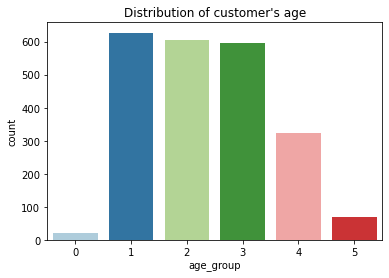

In [131]:
# Plot age_group
sns.set_palette("Paired")
sns.countplot(x = df.age_group)
plt.title("Distribution of customer's age")
plt.show()

In [132]:
 # Calculate number of clients who has card issued in 1996 per age group
age_card96 = pd.DataFrame(df.groupby(['age_group','has_card_96']).agg({'has_card_96':'count'}))
age_card96.rename(columns = {'has_card_96':'number_of_clients'}, inplace = True)
age_card96 = age_card96.reset_index()

pd.set_option('display.max_rows', 12) #https://stackoverflow.com/questions/41221079/rename-multiindex-columns-in-pandas
age_card96

,age_group,has_card_96,number_of_clients
0,0,0,15
1,0,1,6
2,1,0,553
3,1,1,74
4,2,0,545
5,2,1,59
6,3,0,553
7,3,1,42
8,4,0,312
9,4,1,10


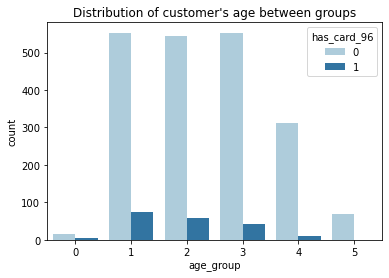

In [133]:
# Plot age_group vs has_card_96
sns.countplot(x = df.age_group, hue = df.has_card_96)
plt.title("Distribution of customer's age between groups")
plt.show()

#### Transaction

In [134]:
transC.head()

,mean_amount,sum_amount,min_amount,max_amount,n_trans,rec_debit_m,rec_credit_m,rec_debit_d,rec_credit_d,credit_mean,debit_mean,debit_cash_mean,credit_sum,debit_sum,debit_cash_sum,others_sum,trans_household_sum,trans_insurance_sum,trans_interest_sum,trans_interest_cred_sum,trans_loan_sum,trans_others_sum,trans_pension_sum,trans_statement_sum,others_mean,trans_household_mean,trans_insurance_mean,trans_interest_mean,trans_interest_cred_mean,trans_loan_mean,trans_others_mean,trans_pension_mean,trans_statement_mean,balance,op_collect_other_bank_mean,op_credit_cash_mean,op_debit_card_mean,op_debit_cash_mean,op_remit_other_bank_mean,ntrans_banks,mean_amount_1,mean_amount_2,mean_amount_3,mean_amount_4,mean_amount_5,mean_amount_6,mean_amount_7,mean_amount_8,mean_amount_9,mean_amount_10,mean_amount_11,mean_amount_12,to_bank
account_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1427.637838,105645.2,14.6,3700.0,74,0,0,0,0,1726.413793,1235.093333,0.0,50066.0,55579.2,0,75228.0,29424,0,0.0,818.0,0.0,0,0,175.2,1979.684211,2452.0,0,0.0,68.166667,0.0,0.0,0,14.6,15980.927027,3679.000000,1020.0,0.0,792.581818,2452.000000,24,1006.641667,1261.060000,1282.26,1642.640000,1461.483333,1328.516667,1368.066667,1595.900000,1584.880000,1581.466667,1803.600000,1680.800000,1
2,6624.907059,563117.1,14.6,30354.0,85,0,0,0,0,9949.755172,3962.101961,14501.4,288542.9,202067.2,72507,473775.0,87192,0,0.0,1974.9,0.0,0,0,175.2,9668.877551,7266.0,0,0.0,164.575000,0.0,0.0,0,14.6,36604.402353,21922.333333,4700.0,0.0,4258.686364,7266.000000,24,5771.670000,6158.666667,6717.15,8089.814286,6602.425000,8033.250000,7220.087500,5197.433333,7559.714286,5748.000000,5272.642857,7154.762500,1
4,2279.438462,88898.1,14.6,5553.0,39,0,0,0,0,3348.264706,1453.527273,0.0,56920.5,31977.6,0,14590.0,10390,0,0.0,590.5,0.0,7710,55530,87.6,2431.666667,2078.0,0,0.0,98.416667,0.0,1285.0,5553,14.6,23648.623077,5553.000000,800.0,0.0,1261.600000,1645.454545,21,0.000000,800.000000,5553.00,5553.000000,5553.000000,5553.000000,1763.840000,2189.316667,2054.916667,1806.240000,1808.120000,1932.814286,1
6,2592.236508,163310.9,14.6,11600.0,63,0,0,0,0,3396.154167,2097.517949,0.0,81507.7,81803.2,0,34180.0,47448,0,0.0,1479.7,0.0,0,80028,175.2,2278.666667,3954.0,0,0.0,123.308333,0.0,0.0,6669,14.6,30651.373016,6669.000000,0.0,0.0,1272.414815,3954.000000,24,1778.083333,2805.480000,2262.14,2455.460000,2691.525000,4469.300000,2685.300000,2688.225000,2691.125000,2490.960000,2695.250000,2625.250000,1
7,10376.350000,41505.4,30.4,33975.0,4,0,0,7,0,11635.133333,6600.000000,0.0,34905.4,6600.0,0,41475.0,0,0,0.0,30.4,0.0,0,0,0.0,13825.000000,0.0,0,0.0,30.400000,0.0,0.0,0,0.0,23088.850000,0.000000,17437.5,0.0,6600.000000,0.000000,0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.000000,13535.133333,0


In [135]:
pd.DataFrame(round(df.sum_amount.describe(), 1))

,sum_amount
count,2238.0
mean,406775.7
std,344187.2
min,2900.0
25%,141288.5
50%,316062.5
75%,549812.2
max,2061754.9


In [136]:
from functools import reduce
data_trans_type = [df.trans_household_sum, df.trans_statement_sum, df.trans_interest_cred_sum]
df_type = map(lambda x: round(x.describe(),1).reset_index(), data_trans_type)

#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
data_type_mean = reduce(lambda x, y: pd.merge(x, y, on ='index'), df_type) 
data_type_mean

,index,trans_household_sum,trans_statement_sum,trans_interest_cred_sum
0,count,2238.0,2238.0,2238.0
1,mean,35608.3,198.1,1807.3
2,std,36102.6,150.4,899.2
3,min,0.0,0.0,0.0
4,25%,0.0,175.2,1140.6
5,50%,28344.0,175.2,1623.9
6,75%,54462.0,175.2,2296.8
7,max,195400.0,1200.0,6653.7


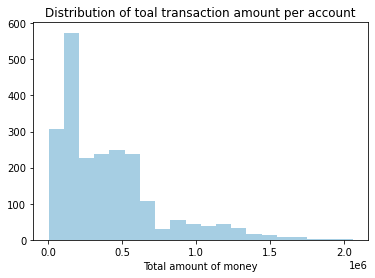

In [137]:
#Plot distribution of transaction amount per account
fig, ax = plt.subplots()
ax.hist(df.sum_amount, bins = 20)
ax.set_title("Distribution of toal transaction amount per account")
ax.set_xlabel("Total amount of money")
plt.show()

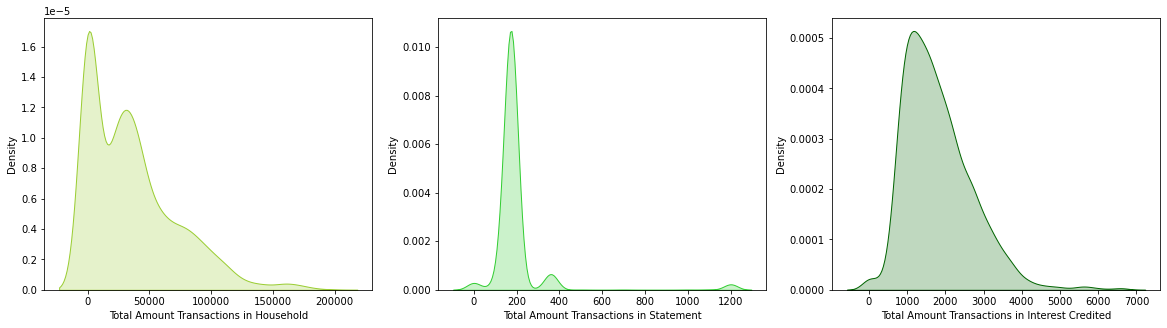

In [138]:
# Plot distribution of average amount transaction in houshold, statement, interest credited
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))
sns.kdeplot(df['trans_household_sum'], shade = True, color = 'yellowgreen', ax = ax0)
sns.kdeplot(df['trans_statement_sum'], shade = True, color = 'limegreen', ax = ax1)
sns.kdeplot(df['trans_interest_cred_sum'], shade = True, color = 'darkgreen', ax = ax2)
ax0.set(xlabel = 'Total Amount Transactions in Household')
ax1.set(xlabel = 'Total Amount Transactions in Statement')
ax2.set(xlabel = 'Total Amount Transactions in Interest Credited')
plt.show()

In [139]:
# Create data frame for each operation variables
data_trans_op = [df.op_collect_other_bank_mean, df.op_credit_cash_mean, df.op_debit_card_mean, df.op_debit_cash_mean, df.op_remit_other_bank_mean]
df_op = map(lambda x: round(x.describe(),1).reset_index(), data_trans_op)

# Merge data frame
data_opration_mean = reduce(lambda x, y: pd.merge(x, y, on ='index'), df_op)
data_opration_mean

,index,op_collect_other_bank_mean,op_credit_cash_mean,op_debit_card_mean,op_debit_cash_mean,op_remit_other_bank_mean
0,count,2238.0,2238.0,2238.0,2238.0,2238.0
1,mean,4201.7,10454.9,173.8,4335.2,2950.8
2,std,9960.7,9880.6,634.7,3776.8,2667.1
3,min,0.0,0.0,0.0,14.6,0.0
4,25%,0.0,0.0,0.0,1411.1,1005.1
5,50%,0.0,7837.8,0.0,3048.0,2418.5
6,75%,4202.2,19553.7,0.0,6285.7,4089.4
7,max,54000.8,35331.3,3900.0,19639.4,14658.0


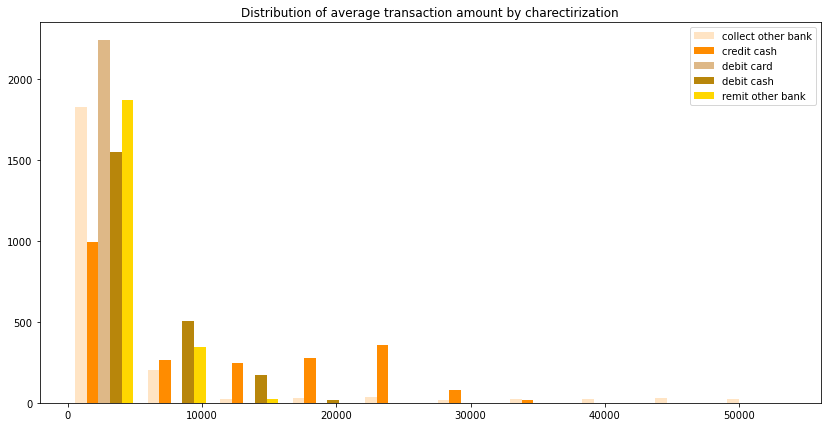

In [140]:
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fig, ax = plt.subplots(figsize = (14,7))
x1 = df.op_collect_other_bank_mean
x2 = df.op_credit_cash_mean
x3 = df.op_debit_card_mean
x4 = df.op_debit_cash_mean
x5 = df.op_remit_other_bank_mean
colors = ['bisque', 'darkorange', 'burlywood', 'darkgoldenrod', 'gold']
labels = ["collect other bank", "credit cash", "debit card", "debit cash", "remit other bank"]
ax.set_title("Distribution of average transaction amount by charectirization")
ax.hist([x1, x2, x3, x4, x5], color = colors, label=labels)
ax.legend()
plt.show()

In [141]:
round(df.balance.describe(),1).reset_index()

,index,balance
0,count,2238.0
1,mean,35869.4
2,std,15775.0
3,min,-525.7
4,25%,23292.4
5,50%,32821.7
6,75%,46253.0
7,max,90196.4


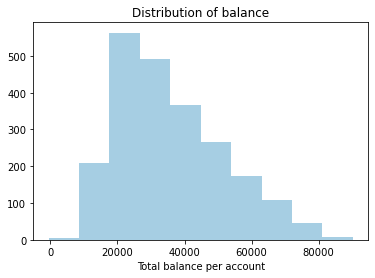

In [142]:
#### Plot balance
fig, ax = plt.subplots()
ax.hist(df.balance.values)
ax.set_xlabel('Total balance per account')
ax.set_title('Distribution of balance')
plt.show()

In [143]:
recency_credit = pd.DataFrame(df.groupby('rec_credit_m')['rec_credit_m'].count())
recency_credit

,rec_credit_m
rec_credit_m,
0.0,2225
1.0,5
2.0,5
3.0,1
4.0,1
8.0,1


In [144]:
recency_debit = pd.DataFrame(df.groupby('rec_debit_m')['rec_debit_m'].count())
recency_debit

,rec_debit_m
rec_debit_m,
0.0,2211
1.0,8
2.0,5
3.0,4
4.0,6
5.0,2
6.0,2


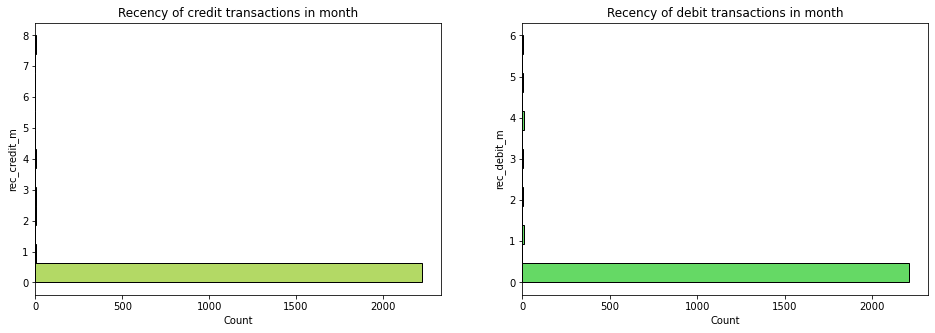

In [145]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
sns.histplot(y = df['rec_credit_m'], color = 'yellowgreen', ax = ax0)
sns.histplot(y = df['rec_debit_m'], color = 'limegreen', ax = ax1)
ax0.set_title("Recency of credit transactions in month")
ax1.set_title("Recency of debit transactions in month")
plt.show()

#### Account

In [146]:
account2.head()

,account_id,frequency,open_year,open_month,open_day,lor
0,576,monthly,1993,1,1,3
1,3818,monthly,1993,1,1,3
2,704,monthly,1993,1,1,3
3,2378,monthly,1993,1,1,3
4,2632,monthly,1993,1,2,3


In [147]:
df['lor'].unique()

array([1, 3, 2])

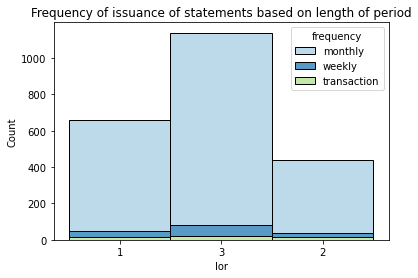

In [148]:
# Plot frequency of issuance of statements based on length of period of a account
g = sns.histplot(data=df, binwidth=0.5, x=df.lor.astype(str), hue="frequency", stat="count", multiple="stack")
g.set_title("Frequency of issuance of statements based on length of period")
plt.show()

#### Disposition

#### District

In [149]:
district.head()

,district_id,district_name,region,inhabitants,nmuni_5,nmuni_2k,nmuni_10k,nmuni_more_10k,ncities,ratio_urb_inhab,avg_sal,unemp_95,unemp_96,entrep,district_size,crime_rate_95,crime_rate_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,1.000,12541,0.0029,0.0043,167,Large,71.104018,82.249681
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,0.467,8507,0.0167,0.0185,132,Medium,24.290086,30.084155
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,0.417,8980,0.0195,0.0221,111,Small,37.537218,37.391004
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,0.674,9753,0.0464,0.0505,109,Large,34.984956,39.308040
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,0.514,9307,0.0385,0.0443,118,Medium,27.359438,31.793842


In [150]:
district["region"].unique()

array(['Prague', 'central Bohemia', 'south Bohemia', 'west Bohemia',
       'north Bohemia', 'east Bohemia', 'south Moravia', 'north Moravia'],
      dtype=object)

In [151]:
region_inhabitants = df.groupby('region')['inhabitants'].agg('sum').reset_index().sort_values('inhabitants')
region_inhabitants

,region,inhabitants
5,south Bohemia,15883979
7,west Bohemia,17530721
1,central Bohemia,24533714
3,north Bohemia,27742934
2,east Bohemia,32048005
6,south Moravia,68810706
4,north Moravia,83315191
0,Prague,327747216


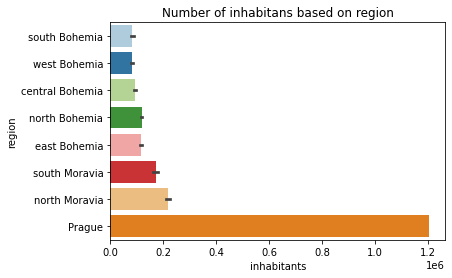

In [152]:
#Plot number of inhabitans based on region
order = region_inhabitants['region']
g = sns.barplot(data=df, x="inhabitants", y="region", order=order)
g.set_title("Number of inhabitans based on region")
plt.show()

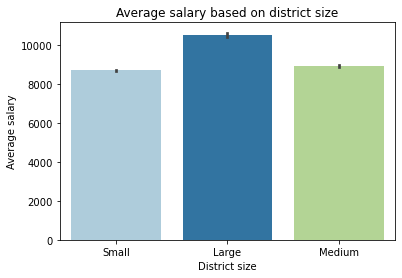

In [153]:
# Plot district size vs avg_sal
g = sns.barplot(data=df, x="district_size", y="avg_sal")
g.set_title("Average salary based on district size")
g.set_xlabel("District size")
g.set_ylabel("Average salary")
plt.show()

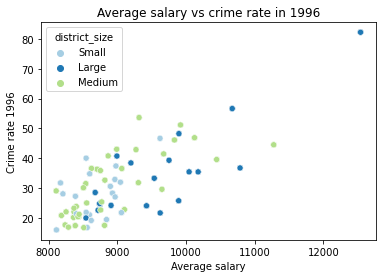

In [154]:
#Plot avg_sal vd crime_rate_96
g = sns.scatterplot(data=df, x="avg_sal", y="crime_rate_96", hue = "district_size")
g.set_title("Average salary vs crime rate in 1996")
g.set_xlabel("Average salary")
g.set_ylabel("Crime rate 1996")
plt.show()

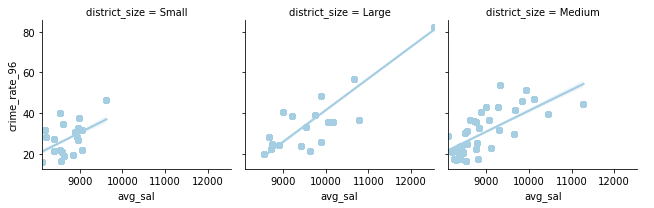

In [155]:
g = sns.FacetGrid(df, col = "district_size")
g.map(sns.regplot, "avg_sal", "crime_rate_96")
g.add_legend()

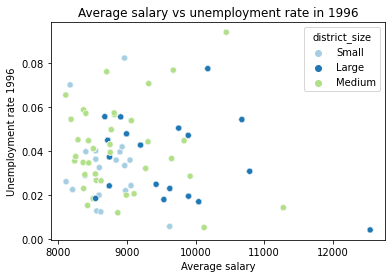

In [156]:
#Plot avg_sal vd unemp_96
g = sns.scatterplot(data=df, x="avg_sal", y="unemp_96", hue = "district_size")
g.set_title("Average salary vs unemployment rate in 1996")
g.set_xlabel("Average salary")
g.set_ylabel("Unemployment rate 1996")
plt.show()

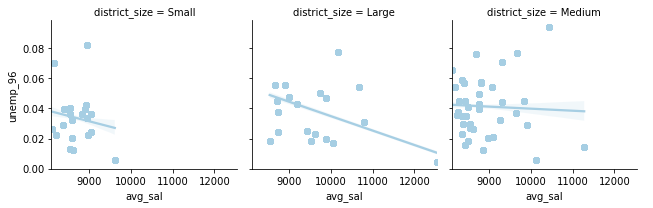

In [157]:
g = sns.FacetGrid(df, col = "district_size")
g.map(sns.regplot, "avg_sal", "unemp_96")
g.add_legend()

#### Order

In [158]:
new_orders.head()

,household_payment,insurance_payment,leasing_payment,loan_payment,other_payments,n_of_banks,n_orders,total_payments
account_id,,,,,,,,
1,2452,0,0.0,0.0,0,1,1,2452.0
2,7266,0,0.0,3372.7,0,2,2,10638.7
3,1135,3539,0.0,0.0,327,3,3,5001.0
4,3363,0,0.0,0.0,0,1,2,3363.0
5,2668,0,0.0,0.0,0,1,1,2668.0


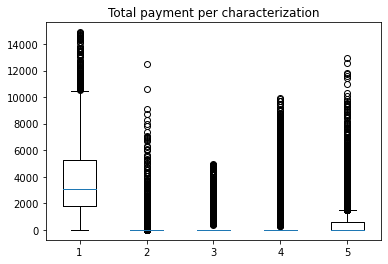

In [159]:
#Order does not include in df
fig, ax = plt.subplots()
ax.boxplot([new_orders["household_payment"], new_orders["insurance_payment"], new_orders["leasing_payment"], new_orders["loan_payment"], new_orders["other_payments"]])
ax.set_title("Total payment per characterization")
plt.show()

#### Loan

In [160]:
loan2.head()

,account_id,time_since_loan
0,1787,1275
1,1801,1269
2,9188,1252
3,1843,1246
4,11013,1212


In [161]:
df.time_since_loan.describe().reset_index()

,index,time_since_loan
0,count,295.000000
1,mean,610.938983
2,std,336.061568
3,min,4.000000
4,25%,322.500000
5,50%,645.000000
6,75%,891.500000
7,max,1275.000000


C:\tools\Anaconda3\envs\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


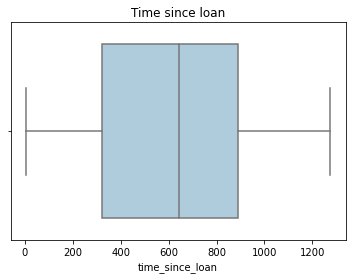

In [162]:
g = sns.boxplot(df.time_since_loan)
g.set_title("Time since loan")
plt.show()

#### Dependent Variables

In [163]:
#### Age vs has_loan_97 & card_issued_97

In [164]:
client.groupby('age_group')['age'].agg([min,max])

,min,max
age_group,,
0,9,14
1,15,29
2,30,44
3,45,59
4,60,74
5,75,85


In [165]:
# Percent of people has loan granted in 1997 in each age_group
df.groupby('age_group')[['age_group','has_loan_97']].mean()

,age_group,has_loan_97
age_group,,
0,0.0,0.000000
1,1.0,0.012759
2,2.0,0.021523
3,3.0,0.015126
4,4.0,0.003106
5,5.0,0.000000


In [166]:
# Calculate number of clients who had granted loan in 1997 in each age group
age_loan97 = pd.DataFrame(df.groupby(['age_group','has_loan_97']).agg({'has_loan_97':'count'}))
age_loan97.rename(columns = {'has_loan_97':'number_of_clients'}, inplace = True)
age_loan97 = age_loan97.reset_index()
age_loan97

,age_group,has_loan_97,number_of_clients
0,0,0,21
1,1,0,619
2,1,1,8
3,2,0,591
4,2,1,13
5,3,0,586
6,3,1,9
7,4,0,321
8,4,1,1
9,5,0,70


<Figure size 864x360 with 0 Axes>

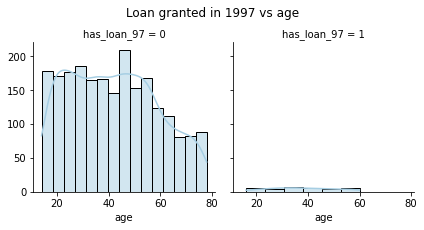

In [167]:
plt.figure(figsize = (12,5))
g = sns.FacetGrid(df, col="has_loan_97")
g.map(sns.histplot, "age", kde = True)
g.fig.suptitle("Loan granted in 1997 vs age", y = 1.05)
plt.show()

In [168]:
# Percent of people has card issued in 1997 in each age_group
df.groupby('age_group')[['age_group','card_issued_97']].mean()

,age_group,card_issued_97
age_group,,
0,0.0,0.000000
1,1.0,0.054226
2,2.0,0.049669
3,3.0,0.087395
4,4.0,0.012422
5,5.0,0.000000


In [169]:
# Calculate number of clients who had creadit card issued in 1997 in each age group
age_card97 = pd.DataFrame(df.groupby(['age_group','card_issued_97']).agg({'card_issued_97':'count'}))
age_card97.rename(columns = {'card_issued_97':'number_of_clients'}, inplace = True)
age_card97 = age_card97.reset_index()
age_card97

,age_group,card_issued_97,number_of_clients
0,0,0,21
1,1,0,593
2,1,1,34
3,2,0,574
4,2,1,30
5,3,0,543
6,3,1,52
7,4,0,318
8,4,1,4
9,5,0,70


<Figure size 864x360 with 0 Axes>

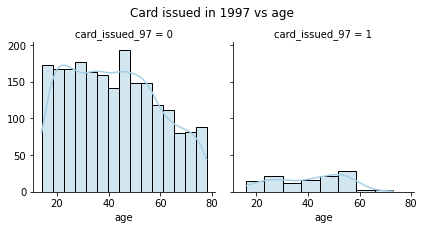

In [170]:
plt.figure(figsize = (12,5))
g = sns.FacetGrid(df, col="card_issued_97")
g.map(sns.histplot, "age", kde = True)
g.fig.suptitle("Card issued in 1997 vs age", y = 1.05)
plt.show()

In [171]:
#### Gender vs has_loan_97 & card_issued_97

In [172]:
df.groupby('gender')['has_loan_97'].sum()

gender
F    17
M    14
Name: has_loan_97, dtype: int32

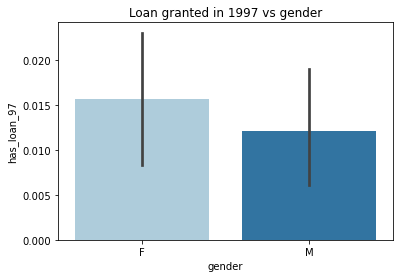

In [173]:
g = sns.barplot(data=df, x="gender", y="has_loan_97")
g.set_title("Loan granted in 1997 vs gender")
plt.show()

In [174]:
df.groupby('gender')['card_issued_97'].sum()

gender
F    48
M    72
Name: card_issued_97, dtype: int32

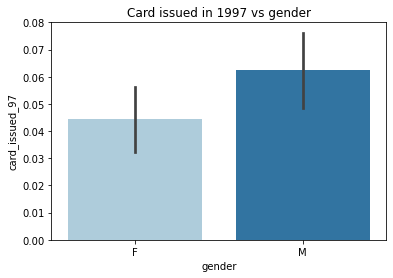

In [175]:
g = sns.barplot(data=df, x="gender", y="card_issued_97")
g.set_title("Card issued in 1997 vs gender")
plt.show()

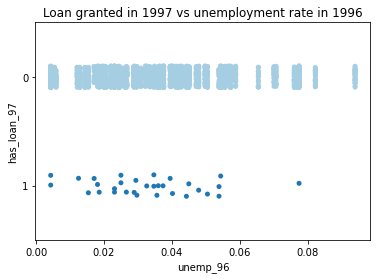

In [176]:
#### has_loan_97 & card_issued_97 vs unemp_96
g = sns.stripplot(data = df, x = df.unemp_96, y = df.has_loan_97.astype(str), jitter = True)
g.set_title("Loan granted in 1997 vs unemployment rate in 1996")
plt.show()

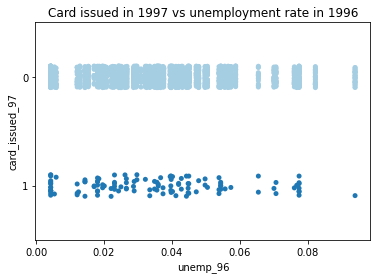

In [177]:
g = sns.stripplot(data = df, x = df.unemp_96, y = df.card_issued_97.astype(str))
g.set_title("Card issued in 1997 vs unemployment rate in 1996")
plt.show()

In [178]:
df.loc[(df.district_size == "Large") & (df.has_loan_97 == 0), 'avg_sal'].mean()

10541.476905311778

In [179]:
df.loc[(df.district_size == "Large") & (df.has_loan_97 == 1), 'avg_sal'].mean()

9891.333333333334

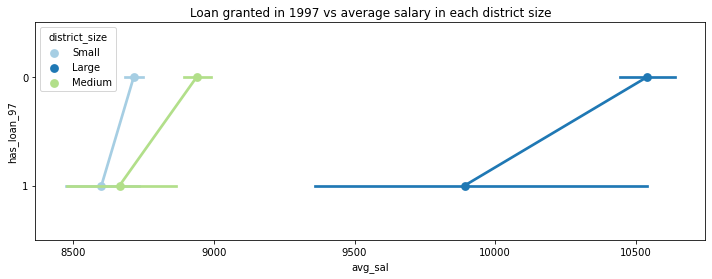

In [180]:
### has_loan_97 & card_issued_97 vs avg_sal
plt.figure(figsize = (12,4))
g = sns.pointplot(data = df, x = df.avg_sal, y = df.has_loan_97.astype(str), hue = df.district_size)
g.set_title("Loan granted in 1997 vs average salary in each district size")
plt.show()

In [181]:
df.loc[(df.district_size == "Large") & (df.card_issued_97 == 0), 'avg_sal'].mean()

10532.77536231884

In [182]:
df.loc[(df.district_size == "Large") & (df.card_issued_97 == 1), 'avg_sal'].mean()

10493.415094339623

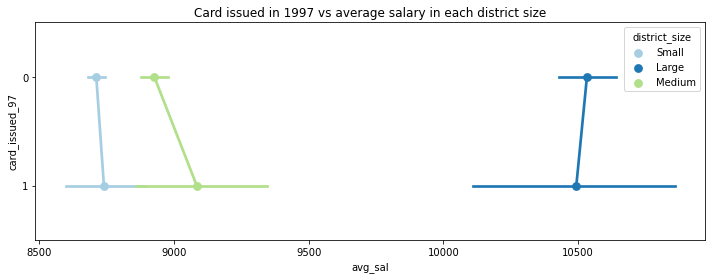

In [183]:
### has_loan_97 & card_issued_97 vs avg_sal
plt.figure(figsize = (12,4))
g = sns.pointplot(data = df, x = df.avg_sal, y = df.card_issued_97.astype(str), hue = df.district_size)
g.set_title("Card issued in 1997 vs average salary in each district size")
plt.show()

In [184]:
loan_region = df.groupby(['has_loan_97', 'region']).size().sort_values().reset_index()
loan_region

,has_loan_97,region,0
0,1,Prague,2
1,1,north Bohemia,2
2,1,south Bohemia,2
3,1,west Bohemia,3
4,1,central Bohemia,4
...,...,...,...
11,0,central Bohemia,261
12,0,Prague,270
13,0,east Bohemia,271
14,0,north Moravia,379


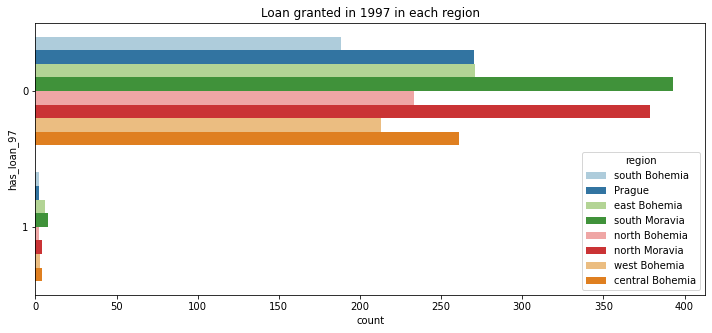

In [185]:
### has_loan_97 & card_issued_97 vs avg_sal
plt.figure(figsize = (12,5))
g = sns.countplot(data = df, y = df.has_loan_97.astype(str), hue = df.region)
g.set_title("Loan granted in 1997 in each region")
plt.show()

In [186]:
card_region = df.groupby(['card_issued_97', 'region']).size().sort_values().reset_index()
card_region

,card_issued_97,region,0
0,1,south Bohemia,8
1,1,west Bohemia,10
2,1,Prague,15
3,1,north Bohemia,15
4,1,east Bohemia,17
...,...,...,...
11,0,central Bohemia,247
12,0,Prague,257
13,0,east Bohemia,260
14,0,north Moravia,363


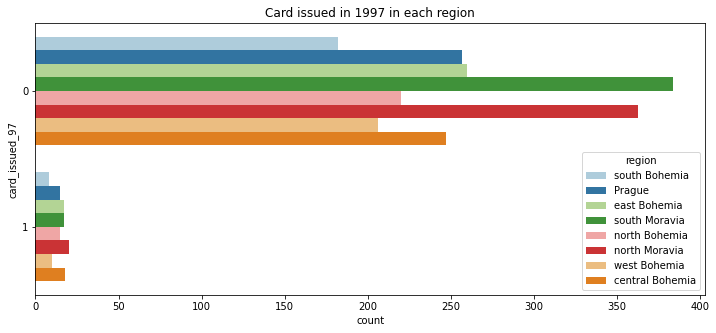

In [187]:
### has_loan_97 & card_issued_97 vs avg_sal
plt.figure(figsize = (12,5))
g = sns.countplot(data = df, y = df.card_issued_97.astype(str), hue = df.region)
g.set_title("Card issued in 1997 in each region")
plt.show()

[Text(0.5, 0, 'Total Debit Cash Amount Transactions')]

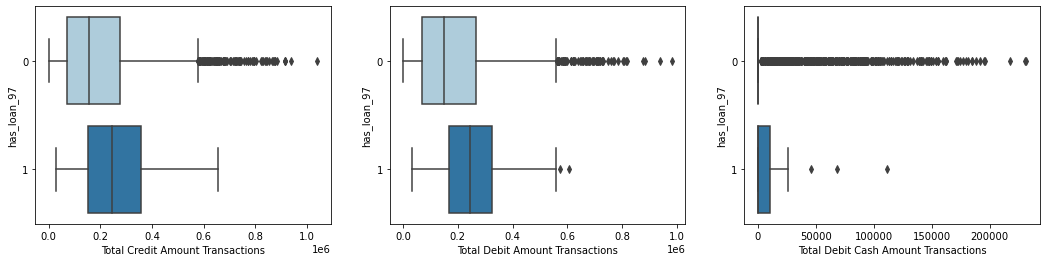

In [188]:
#### Has_loan_97 vs credit_sum, debit_sum, debit_cash_sum
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 4))
sns.boxplot( x=df.credit_sum, y = df.has_loan_97.astype(str), ax = ax0)
sns.boxplot( x=df.debit_sum, y = df.has_loan_97.astype(str), ax=ax1)
sns.boxplot( x=df.debit_cash_sum, y = df.has_loan_97.astype(str), ax=ax2)
ax0.set(xlabel = 'Total Credit Amount Transactions')
ax1.set(xlabel = 'Total Debit Amount Transactions')
ax2.set(xlabel = 'Total Debit Cash Amount Transactions')


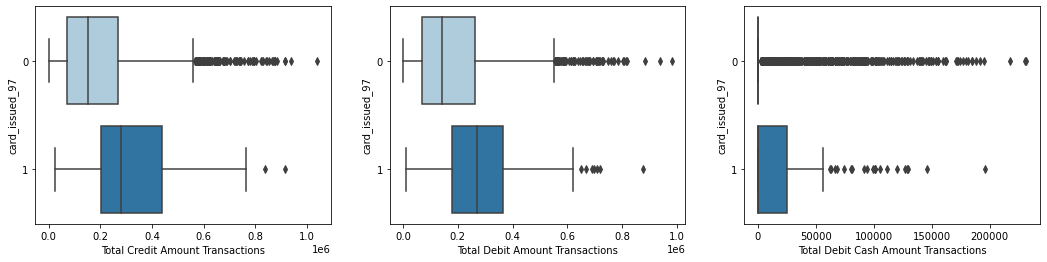

In [189]:
#### card_issued_97 vs credit_sum, debit_sum, debit_cash_sum
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 4))
sns.boxplot( x=df.credit_sum, y = df.card_issued_97.astype(str), ax = ax0)
sns.boxplot( x=df.debit_sum, y = df.card_issued_97.astype(str), ax=ax1)
sns.boxplot( x=df.debit_cash_sum, y = df.card_issued_97.astype(str), ax=ax2)
ax0.set(xlabel = 'Total Credit Amount Transactions')
ax1.set(xlabel = 'Total Debit Amount Transactions')
ax2.set(xlabel = 'Total Debit Cash Amount Transactions')
plt.show()

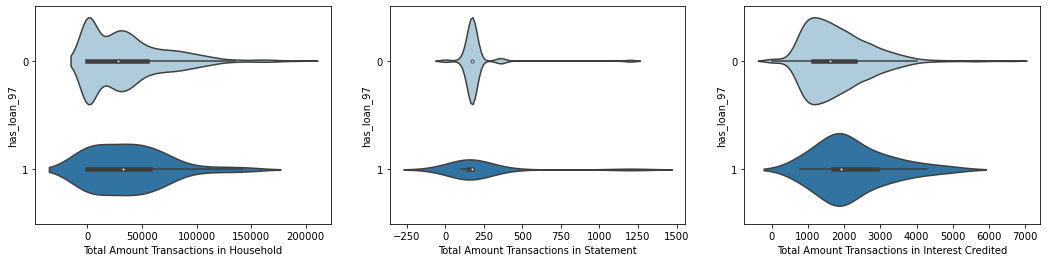

In [190]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 4))
sns.violinplot(data = df, x = df.trans_household_sum, y = df.has_loan_97.astype(str), ax = ax0)
sns.violinplot(data = df, x = df.trans_statement_sum, y = df.has_loan_97.astype(str), ax = ax1)
sns.violinplot(data = df, x = df.trans_interest_cred_sum, y = df.has_loan_97.astype(str), ax = ax2)
ax0.set(xlabel = 'Total Amount Transactions in Household')
ax1.set(xlabel = 'Total Amount Transactions in Statement')
ax2.set(xlabel = 'Total Amount Transactions in Interest Credited')
plt.show()

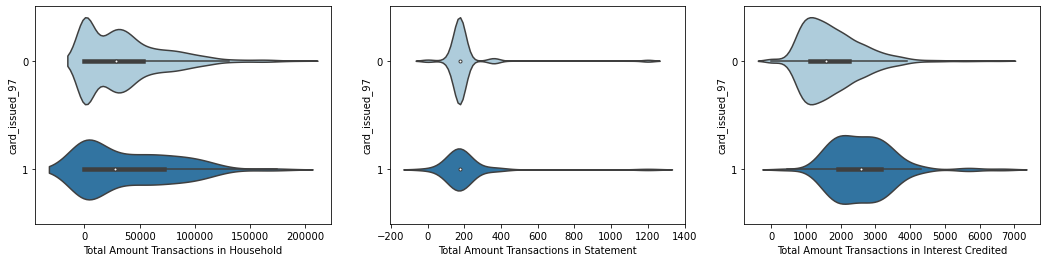

In [191]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 4))
sns.violinplot(data = df, x = df.trans_household_sum, y = df.card_issued_97.astype(str), ax = ax0)
sns.violinplot(data = df, x = df.trans_statement_sum, y = df.card_issued_97.astype(str), ax = ax1)
sns.violinplot(data = df, x = df.trans_interest_cred_sum, y = df.card_issued_97.astype(str), ax = ax2)
ax0.set(xlabel = 'Total Amount Transactions in Household')
ax1.set(xlabel = 'Total Amount Transactions in Statement')
ax2.set(xlabel = 'Total Amount Transactions in Interest Credited')
plt.show()

In [192]:
df.groupby('has_loan_97')['balance'].agg(['mean','median','min', 'max'])

,mean,median,min,max
has_loan_97,,,,
0,35802.462622,32690.257534,-525.731250,90196.389524
1,40635.493325,40047.742500,15432.748235,68364.479104


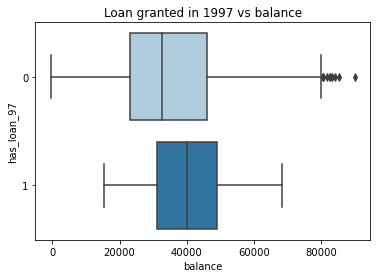

In [193]:
#### has_loan_97 & card_issued_97 vs balance
g = sns.boxplot(data = df, x = df.balance, y = df.has_loan_97.astype(str))
g.set_title("Loan granted in 1997 vs balance")
plt.show()

In [194]:
df.groupby('card_issued_97')['balance'].agg(['mean','median','min', 'max'])

,mean,median,min,max
card_issued_97,,,,
0,34993.487627,31859.823758,-525.73125,90196.389524
1,51329.404206,50646.025995,13003.02963,83249.685294


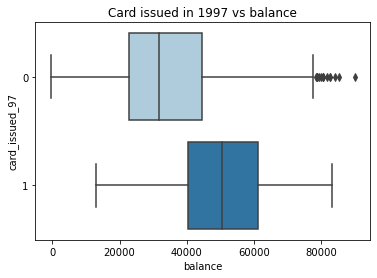

In [195]:
#### has_loan_97 & card_issued_97 vs balance
g = sns.boxplot(data = df, x = df.balance, y = df.card_issued_97.astype(str))
g.set_title("Card issued in 1997 vs balance")
plt.show()

# Save the Base Table

In [198]:
df.to_csv(r'./FP_GroupProject_Group10/data/processed/base_table_final.csv',index=False)